## Import ccssm json into pandas dataframe

In [21]:
import json

In [22]:
import pandas as pd

In [23]:
with open("standards.json") as json_data:
    standards = json.load(json_data)

df = pd.DataFrame.from_dict(standards['standards'], orient='columns')
df.set_index("name", drop=True, inplace=True)
df

grade                      domain  \
name                                               
K.CC.1  Kindergarten    Counting and Cardinality   
K.CC.2  Kindergarten    Counting and Cardinality   
K.CC.3  Kindergarten    Counting and Cardinality   
K.CC.4  Kindergarten    Counting and Cardinality   
K.CC.5  Kindergarten    Counting and Cardinality   
...              ...                         ...   
8.G.9      8th Grade                    Geometry   
8.SP.1     8th Grade  Statistics and Probability   
8.SP.2     8th Grade  Statistics and Probability   
8.SP.3     8th Grade  Statistics and Probability   
8.SP.4     8th Grade  Statistics and Probability   

                                              description              from  \
name                                                                          
K.CC.1                  Count to 100 by ones and by tens.                []   
K.CC.2  Count forward beginning from a given number wi...          [K.CC.1]   
K.CC.3  Write numbers from 0 to 20. Represent a number...                []   
K.CC.4  Understand the relationship between numbers an...  [K.CC.1, K.CC.2]   
K.CC.5  Count to answer “how many?” questions about as...          [K.CC.4]   
...                                                   ...               ...   
8.G.9   Know the formulas for the volumes of cones, cy...          [8.EE.2]   
8.SP.1  Construct and interpret scatter plots for biva...          [6.NS.8]   
8.SP.2  Know that straight lines are widely used to mo...          [8.SP.1]   
8.SP.3  Use the equation of a linear model to solve pr...          [8.SP.2]   
8.SP.4  Understand that patterns of association can al...                []   

                                                       to  
name                                                       
K.CC.1                          [K.CC.2, K.CC.4, 1.NBT.1]  
K.CC.2                                           [K.CC.4]  
K.CC.3                                                 []  
K.CC.4                                   [K.CC.5, 1.OA.5]  
K.CC.5                                           [K.CC.6]  
...                                                   ...  
8.G.9   [HS.G-GMD.1, HS.G-GMD.2, HS.G-GMD.3, HS.G-MG.1...  
8.SP.1                    [8.SP.2, HS.S-ID.6c, HS.S-ID.9]  
8.SP.2        [8.SP.3, HS.S-ID.6b, HS.S-ID.6c, HS.S-ID.8]  
8.SP.3                                        [HS.S-ID.7]  
8.SP.4                  [HS.S-CP.4, HS.S-ID.5, HS.S-ID.9]  

[229 rows x 5 columns]

## Verify edges

In [24]:
for std in df.index:
    for successor in df.loc[std, "to"]:
        if "HS" not in successor:
            if std not in df.loc[successor, "from"]:
                print(std + " not in " + successor)
print("all done")

all done


In [25]:
for std in df.index:
    for predecessor in df.loc[std, "from"]:
        if std not in df.loc[predecessor, "to"]:
            print(std + " not in " + predecessor)
print("all done")

all done


## Visualize ccssm as a force directed graph

In [26]:
from d3graph import d3graph, vec2adjmat

In [27]:
source = []
target = []
num_targets = 0
for std in df.index:
    num_targets = 0
    for successor in df.loc[std, "to"]:
        if "HS" not in successor:
            source.append(std)
            target.append(successor)
            num_targets += 1
    if num_targets == 0:
        source.append(std)
        target.append(std)
adjmat = vec2adjmat(source, target)
adjmat

target  1.G.1  1.G.2  1.G.3  1.MD.1  1.MD.2  1.MD.4  1.NBT.1  1.NBT.2  \
source                                                                  
1.G.1     0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
1.G.2     0.0    0.0    1.0     0.0     0.0     0.0      0.0      0.0   
1.G.3     0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
1.MD.1    0.0    0.0    0.0     0.0     1.0     0.0      0.0      0.0   
1.MD.2    0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
...       ...    ...    ...     ...     ...     ...      ...      ...   
K.G.2     0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
K.G.3     0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
K.G.6     0.0    1.0    0.0     0.0     0.0     0.0      0.0      0.0   
K.MD.1    0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   
K.OA.1    0.0    0.0    0.0     0.0     0.0     0.0      0.0      0.0   

target  1.NBT.3  1.NBT.4  ...  7.G.2  7.SP.5  8.G.7  K.CC.1  K.G.1  K.G.2  \
source                    ...                                               
1.G.1       0.0      0.0  ...      0       0      0       0      0      0   
1.G.2       0.0      0.0  ...      0       0      0       0      0      0   
1.G.3       0.0      0.0  ...      0       0      0       0      0      0   
1.MD.1      0.0      0.0  ...      0       0      0       0      0      0   
1.MD.2      0.0      0.0  ...      0       0      0       0      0      0   
...         ...      ...  ...    ...     ...    ...     ...    ...    ...   
K.G.2       0.0      0.0  ...      0       0      0       0      0      0   
K.G.3       0.0      0.0  ...      0       0      0       0      0      0   
K.G.6       0.0      0.0  ...      0       0      0       0      0      0   
K.MD.1      0.0      0.0  ...      0       0      0       0      0      0   
K.OA.1      0.0      0.0  ...      0       0      0       0      0      0   

target  K.G.3  K.G.6  K.MD.1  K.OA.1  
source                                
1.G.1       0      0       0       0  
1.G.2       0      0       0       0  
1.G.3       0      0       0       0  
1.MD.1      0      0       0       0  
1.MD.2      0      0       0       0  
...       ...    ...     ...     ...  
K.G.2       0      0       0       0  
K.G.3       0      0       0       0  
K.G.6       0      0       0       0  
K.MD.1      0      0       0       0  
K.OA.1      0      0       0       0  

[229 rows x 229 columns]

In [28]:
# Initialize
d3 = d3graph()
# Proces adjmat
d3.graph(adjmat)

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[clustimage] >WARNING> Colormap [Set2] can not create [12] unique colors! Available unique colors: [8].
[d3graph] WARNING> Colormap [Set2] can not create [12] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 220


In [29]:
# For some reason singleton standards are excluded from the graph
for std in df.index:
    if std not in d3.node_properties:
        print(std)

K.CC.3
2.MD.8
2.MD.9
3.MD.1
3.MD.3
7.EE.2
7.G.3
8.NS.2
8.SP.4


In [30]:
colordict = {"Kindergarten": "#1f77b4", 
             "1st Grade": "#ff7f0e",
             "2nd Grade": "#2ca02c",
             "3rd Grade": "#d62728",
             "4th Grade": "#9467bd",
             "5th Grade": "#8c564b",
             "6th Grade": "#e377c2",
             "7th Grade": "#bcbd22",
             "8th Grade": "#17becf"}

In [31]:
d3.set_node_properties(tooltip = [std + "\n" + df.loc[std, "description"] for std in d3.node_properties.keys()],
                       color = [colordict[df.loc[std,"grade"]] for std in d3.node_properties.keys()],
                       size = "degree")
d3.set_edge_properties(directed=True)

[d3graph] INFO> Number of unique nodes: 220
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..


In [32]:
d3.show()

[d3graph] INFO> Slider range is set to [0, 1]
[d3graph] INFO> Write to path: [/tmp/tmp1hz424ap/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/tmp/tmp1hz424ap/d3graph.html]


## vertex analysis

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_degree = df.copy(deep=True)
df_degree["from"] = df_degree["from"].apply(len)
df_degree["to"] = df_degree["to"].apply(len)
df_degree

grade                      domain  \
name                                               
K.CC.1  Kindergarten    Counting and Cardinality   
K.CC.2  Kindergarten    Counting and Cardinality   
K.CC.3  Kindergarten    Counting and Cardinality   
K.CC.4  Kindergarten    Counting and Cardinality   
K.CC.5  Kindergarten    Counting and Cardinality   
...              ...                         ...   
8.G.9      8th Grade                    Geometry   
8.SP.1     8th Grade  Statistics and Probability   
8.SP.2     8th Grade  Statistics and Probability   
8.SP.3     8th Grade  Statistics and Probability   
8.SP.4     8th Grade  Statistics and Probability   

                                              description  from  to  
name                                                                 
K.CC.1                  Count to 100 by ones and by tens.     0   3  
K.CC.2  Count forward beginning from a given number wi...     1   1  
K.CC.3  Write numbers from 0 to 20. Represent a number...     0   0  
K.CC.4  Understand the relationship between numbers an...     2   2  
K.CC.5  Count to answer “how many?” questions about as...     1   1  
...                                                   ...   ...  ..  
8.G.9   Know the formulas for the volumes of cones, cy...     1   5  
8.SP.1  Construct and interpret scatter plots for biva...     1   3  
8.SP.2  Know that straight lines are widely used to mo...     1   4  
8.SP.3  Use the equation of a linear model to solve pr...     1   1  
8.SP.4  Understand that patterns of association can al...     0   3  

[229 rows x 5 columns]

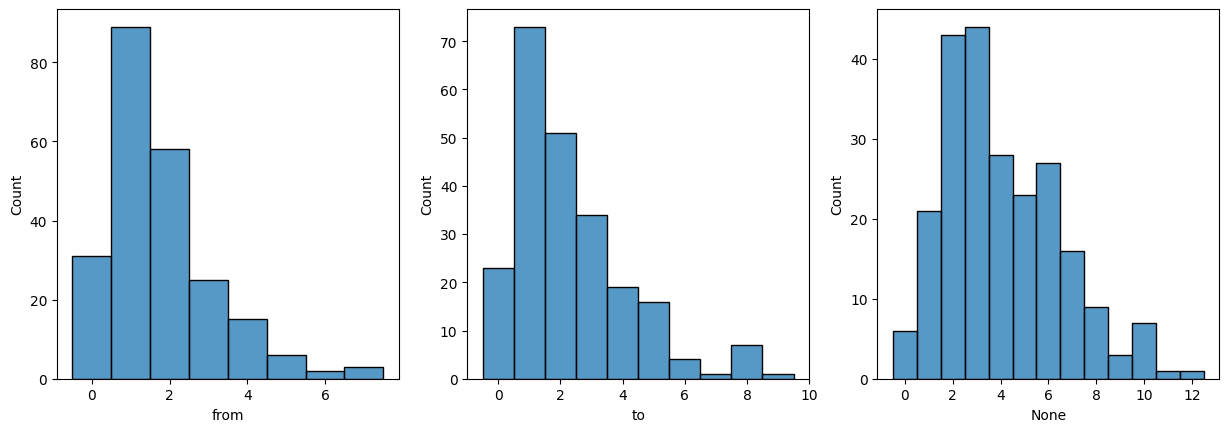

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
sns.histplot(data=df_degree, x="from", discrete=True, ax=ax1)
sns.histplot(data=df_degree, x="to", discrete=True, ax=ax2)
degree = df_degree["from"] + df_degree["to"]
sns.histplot(x = degree, discrete=True, ax=ax3)
plt.show()

In [36]:
df_degree["degree"] = degree

### Highest degree

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_degree.sort_values("degree", ascending=False))

grade                                 domain  \
name                                                           
7.RP.2      7th Grade  Ratios and Proportional Relationships   
8.EE.8      8th Grade              Expressions and Equations   
2.NBT.1     2nd Grade      Number and Operations in Base Ten   
5.NBT.1     5th Grade      Number and Operations in Base Ten   
3.OA.1      3rd Grade      Operations and Algebraic Thinking   
3.OA.5      3rd Grade      Operations and Algebraic Thinking   
4.NF.3      4th Grade        Number and Operations—Fractions   
7.EE.1      7th Grade              Expressions and Equations   
8.F.4       8th Grade                              Functions   
4.OA.2      4th Grade      Operations and Algebraic Thinking   
4.MD.2      4th Grade                   Measurement and Data   
1.OA.6      1st Grade      Operations and Algebraic Thinking   
4.NBT.6     4th Grade      Number and Operations in Base Ten   
8.EE.6      8th Grade              Expressions and Equations   
5.NF.4      5th Grade        Number and Operations—Fractions   
5.NF.5      5th Grade        Number and Operations—Fractions   
6.SP.2      6th Grade             Statistics and Probability   
6.EE.2      6th Grade               Exressions and Equations   
5.NF.3      5th Grade        Number and Operations—Fractions   
7.EE.4      7th Grade              Expressions and Equations   
6.G.1       6th Grade                               Geometry   
8.F.2       8th Grade                              Functions   
7.NS.3      7th Grade                      The Number System   
4.NBT.5     4th Grade      Number and Operations in Base Ten   
4.NF.1      4th Grade        Number and Operations—Fractions   
6.NS.6      6th Grade                      The Number System   
5.NBT.7     5th Grade      Number and Operations in Base Ten   
1.NBT.2     1st Grade      Number and Operations in Base Ten   
5.MD.2      5th Grade                   Measurement and Data   
6.RP.2      6th Grade  Ratios and Proportional Relationships   
5.NF.7      5th Grade        Number and Operations—Fractions   
8.EE.2      8th Grade              Expressions and Equations   
7.RP.3      7th Grade  Ratios and Proportional Relationships   
8.G.8       8th Grade                               Geometry   
4.NBT.1     4th Grade      Number and Operations in Base Ten   
4.NF.4      4th Grade        Number and Operations—Fractions   
3.NF.1      3rd Grade        Number and Operations—Fractions   
6.EE.3      6th Grade               Exressions and Equations   
2.OA.1      2nd Grade      Operations and Algebraic Thinking   
5.NBT.6     5th Grade      Number and Operations in Base Ten   
5.NF.1      5th Grade        Number and Operations—Fractions   
1.OA.3      1st Grade      Operations and Algebraic Thinking   
6.RP.3      6th Grade  Ratios and Proportional Relationships   
6.RP.1      6th Grade  Ratios and Proportional Relationships   
K.OA.2   Kindergarten      Operations and Algebraic Thinking   
8.G.9       8th Grade                               Geometry   
5.NF.6      5th Grade        Number and Operations—Fractions   
8.EE.1      8th Grade              Expressions and Equations   
6.EE.4      6th Grade               Exressions and Equations   
7.SP.1      7th Grade             Statistics and Probability   
3.NBT.2     3rd Grade      Number and Operations in Base Ten   
7.G.6       7th Grade                               Geometry   
3.OA.3      3rd Grade      Operations and Algebraic Thinking   
3.MD.5      3rd Grade                   Measurement and Data   
3.NF.2      3rd Grade        Number and Operations—Fractions   
3.OA.7      3rd Grade      Operations and Algebraic Thinking   
3.OA.2      3rd Grade      Operations and Algebraic Thinking   
7.NS.2      7th Grade                      The Number System   
7.NS.1      7th Grade                      The Number System   
8.G.5       8th Grade                               Geometry   
8.F.1       8th Grade                           

### Most in

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_degree.sort_values("from", ascending=False))

grade                                 domain  \
name                                                           
1.OA.6      1st Grade      Operations and Algebraic Thinking   
4.NF.3      4th Grade        Number and Operations—Fractions   
5.NF.5      5th Grade        Number and Operations—Fractions   
5.NF.3      5th Grade        Number and Operations—Fractions   
4.NBT.6     4th Grade      Number and Operations in Base Ten   
4.MD.2      4th Grade                   Measurement and Data   
4.NBT.5     4th Grade      Number and Operations in Base Ten   
5.NBT.7     5th Grade      Number and Operations in Base Ten   
5.NF.6      5th Grade        Number and Operations—Fractions   
6.EE.3      6th Grade               Exressions and Equations   
6.EE.4      6th Grade               Exressions and Equations   
6.NS.3      6th Grade                      The Number System   
5.MD.5      5th Grade                   Measurement and Data   
7.EE.4      7th Grade              Expressions and Equations   
7.NS.2      7th Grade                      The Number System   
7.NS.3      7th Grade                      The Number System   
7.NS.1      7th Grade                      The Number System   
6.RP.1      6th Grade  Ratios and Proportional Relationships   
5.NBT.1     5th Grade      Number and Operations in Base Ten   
5.MD.2      5th Grade                   Measurement and Data   
8.F.2       8th Grade                              Functions   
2.NBT.5     2nd Grade      Number and Operations in Base Ten   
4.NF.4      4th Grade        Number and Operations—Fractions   
2.OA.1      2nd Grade      Operations and Algebraic Thinking   
5.NBT.6     5th Grade      Number and Operations in Base Ten   
6.RP.2      6th Grade  Ratios and Proportional Relationships   
6.NS.6      6th Grade                      The Number System   
7.G.6       7th Grade                               Geometry   
6.EE.7      6th Grade               Exressions and Equations   
K.G.5    Kindergarten                               Geometry   
6.RP.3      6th Grade  Ratios and Proportional Relationships   
K.G.4    Kindergarten                               Geometry   
7.RP.2      7th Grade  Ratios and Proportional Relationships   
6.EE.2      6th Grade               Exressions and Equations   
7.SP.1      7th Grade             Statistics and Probability   
8.EE.3      8th Grade              Expressions and Equations   
5.NBT.3     5th Grade      Number and Operations in Base Ten   
5.NBT.4     5th Grade      Number and Operations in Base Ten   
5.NBT.5     5th Grade      Number and Operations in Base Ten   
5.MD.1      5th Grade                   Measurement and Data   
5.NF.7      5th Grade        Number and Operations—Fractions   
1.MD.4      1st Grade                   Measurement and Data   
4.MD.3      4th Grade                   Measurement and Data   
8.EE.6      8th Grade              Expressions and Equations   
4.NBT.3     4th Grade      Number and Operations in Base Ten   
4.OA.3      4th Grade      Operations and Algebraic Thinking   
8.EE.8      8th Grade              Expressions and Equations   
7.SP.3      7th Grade             Statistics and Probability   
3.NBT.2     3rd Grade      Number and Operations in Base Ten   
8.F.3       8th Grade                              Functions   
8.F.5       8th Grade                              Functions   
7.RP.3      7th Grade  Ratios and Proportional Relationships   
8.G.1       8th Grade                               Geometry   
8.G.3       8th Grade                               Geometry   
K.MD.3   Kindergarten                   Measurement and Data   
8.G.8       8th Grade                               Geometry   
K.CC.4   Kindergarten               Counting and Cardinality   
2.MD.2      2nd Grade                   Measurement and Data   
6.SP.3      6th Grade             Statistics and Probability   
6.SP.5      6th Grade             Statistics and Probability   
2.G.3       2nd Grade                           

### Most out

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_degree.sort_values("to", ascending=False))

grade                                 domain  \
name                                                           
7.RP.2      7th Grade  Ratios and Proportional Relationships   
3.OA.1      3rd Grade      Operations and Algebraic Thinking   
3.OA.5      3rd Grade      Operations and Algebraic Thinking   
7.EE.1      7th Grade              Expressions and Equations   
8.EE.8      8th Grade              Expressions and Equations   
2.NBT.1     2nd Grade      Number and Operations in Base Ten   
4.OA.2      4th Grade      Operations and Algebraic Thinking   
8.F.4       8th Grade                              Functions   
6.SP.2      6th Grade             Statistics and Probability   
5.NBT.1     5th Grade      Number and Operations in Base Ten   
5.NF.4      5th Grade        Number and Operations—Fractions   
6.G.1       6th Grade                               Geometry   
4.NBT.1     4th Grade      Number and Operations in Base Ten   
3.OA.6      3rd Grade      Operations and Algebraic Thinking   
3.OA.2      3rd Grade      Operations and Algebraic Thinking   
8.EE.2      8th Grade              Expressions and Equations   
8.EE.6      8th Grade              Expressions and Equations   
8.EE.1      8th Grade              Expressions and Equations   
3.NF.2      3rd Grade        Number and Operations—Fractions   
8.G.8       8th Grade                               Geometry   
1.OA.3      1st Grade      Operations and Algebraic Thinking   
3.NF.1      3rd Grade        Number and Operations—Fractions   
7.RP.3      7th Grade  Ratios and Proportional Relationships   
1.NBT.2     1st Grade      Number and Operations in Base Ten   
6.EE.2      6th Grade               Exressions and Equations   
8.G.9       8th Grade                               Geometry   
4.NF.1      4th Grade        Number and Operations—Fractions   
K.OA.2   Kindergarten      Operations and Algebraic Thinking   
8.F.1       8th Grade                              Functions   
K.OA.3   Kindergarten      Operations and Algebraic Thinking   
5.OA.2      5th Grade      Operations and Algebraic Thinking   
8.SP.2      8th Grade             Statistics and Probability   
8.G.1       8th Grade                               Geometry   
7.G.4       7th Grade                               Geometry   
8.G.2       8th Grade                               Geometry   
3.MD.5      3rd Grade                   Measurement and Data   
5.NF.1      5th Grade        Number and Operations—Fractions   
5.NF.7      5th Grade        Number and Operations—Fractions   
8.G.5       8th Grade                               Geometry   
8.G.7       8th Grade                               Geometry   
6.EE.5      6th Grade               Exressions and Equations   
1.OA.4      1st Grade      Operations and Algebraic Thinking   
7.EE.2      7th Grade              Expressions and Equations   
7.EE.4      7th Grade              Expressions and Equations   
3.OA.7      3rd Grade      Operations and Algebraic Thinking   
3.OA.3      3rd Grade      Operations and Algebraic Thinking   
6.NS.6      6th Grade                      The Number System   
4.MD.2      4th Grade                   Measurement and Data   
8.SP.4      8th Grade             Statistics and Probability   
K.CC.1   Kindergarten               Counting and Cardinality   
4.OA.1      4th Grade      Operations and Algebraic Thinking   
6.NS.1      6th Grade                      The Number System   
6.RP.3      6th Grade  Ratios and Proportional Relationships   
2.MD.1      2nd Grade                   Measurement and Data   
7.SP.1      7th Grade             Statistics and Probability   
4.NF.3      4th Grade        Number and Operations—Fractions   
4.NBT.4     4th Grade      Number and Operations in Base Ten   
7.G.6       7th Grade                               Geometry   
7.G.2       7th Grade                               Geometry   
8.F.5       8th Grade                              Functions   
8.F.2       8th Grade                           

### Sources (+) and Sinks (-)

In [40]:
df_degree["difference"] = df_degree["to"] - df_degree["from"]

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_degree.sort_values(["difference", "to"], ascending=False))

grade                                 domain  \
name                                                           
4.OA.2      4th Grade      Operations and Algebraic Thinking   
7.RP.2      7th Grade  Ratios and Proportional Relationships   
2.NBT.1     2nd Grade      Number and Operations in Base Ten   
3.OA.1      3rd Grade      Operations and Algebraic Thinking   
3.OA.5      3rd Grade      Operations and Algebraic Thinking   
7.EE.1      7th Grade              Expressions and Equations   
8.F.4       8th Grade                              Functions   
6.SP.2      6th Grade             Statistics and Probability   
8.EE.8      8th Grade              Expressions and Equations   
4.NBT.1     4th Grade      Number and Operations in Base Ten   
3.OA.6      3rd Grade      Operations and Algebraic Thinking   
5.NF.4      5th Grade        Number and Operations—Fractions   
6.G.1       6th Grade                               Geometry   
K.OA.2   Kindergarten      Operations and Algebraic Thinking   
1.OA.3      1st Grade      Operations and Algebraic Thinking   
3.OA.2      3rd Grade      Operations and Algebraic Thinking   
3.NF.2      3rd Grade        Number and Operations—Fractions   
8.EE.1      8th Grade              Expressions and Equations   
8.F.1       8th Grade                              Functions   
8.G.9       8th Grade                               Geometry   
7.EE.2      7th Grade              Expressions and Equations   
8.G.7       8th Grade                               Geometry   
1.NBT.2     1st Grade      Number and Operations in Base Ten   
3.NF.1      3rd Grade        Number and Operations—Fractions   
4.NF.1      4th Grade        Number and Operations—Fractions   
7.RP.3      7th Grade  Ratios and Proportional Relationships   
8.EE.2      8th Grade              Expressions and Equations   
8.G.8       8th Grade                               Geometry   
K.OA.3   Kindergarten      Operations and Algebraic Thinking   
1.OA.4      1st Grade      Operations and Algebraic Thinking   
5.OA.2      5th Grade      Operations and Algebraic Thinking   
6.EE.5      6th Grade               Exressions and Equations   
7.G.4       7th Grade                               Geometry   
8.G.2       8th Grade                               Geometry   
8.SP.2      8th Grade             Statistics and Probability   
K.CC.1   Kindergarten               Counting and Cardinality   
1.OA.7      1st Grade      Operations and Algebraic Thinking   
4.MD.5      4th Grade                   Measurement and Data   
7.G.2       7th Grade                               Geometry   
8.SP.4      8th Grade             Statistics and Probability   
5.NBT.1     5th Grade      Number and Operations in Base Ten   
6.EE.2      6th Grade               Exressions and Equations   
8.EE.6      8th Grade              Expressions and Equations   
3.OA.3      3rd Grade      Operations and Algebraic Thinking   
3.OA.7      3rd Grade      Operations and Algebraic Thinking   
3.MD.5      3rd Grade                   Measurement and Data   
5.NF.1      5th Grade        Number and Operations—Fractions   
8.G.1       8th Grade                               Geometry   
8.G.5       8th Grade                               Geometry   
1.OA.1      1st Grade      Operations and Algebraic Thinking   
1.G.2       1st Grade                               Geometry   
2.MD.1      2nd Grade                   Measurement and Data   
4.NF.6      4th Grade        Number and Operations—Fractions   
5.OA.3      5th Grade      Operations and Algebraic Thinking   
5.G.2       5th Grade                               Geometry   
7.RP.1      7th Grade  Ratios and Proportional Relationships   
8.SP.1      8th Grade             Statistics and Probability   
K.G.1    Kindergarten                               Geometry   
K.G.2    Kindergarten                               Geometry   
K.G.3    Kindergarten                               Geometry   
2.G.2       2nd Grade                           

<Axes: xlabel='difference', ylabel='Count'>

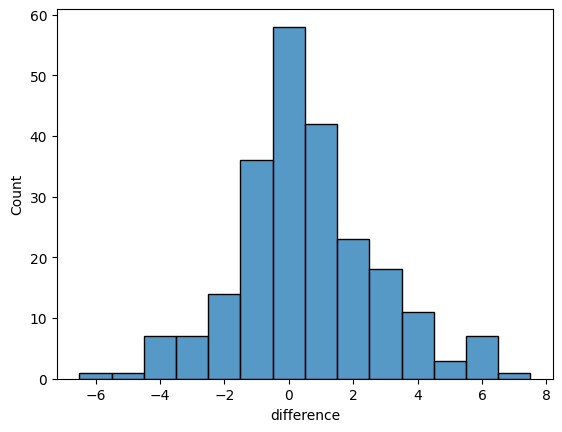

In [42]:
sns.histplot(data=df_degree, x="difference", discrete=True)

In [43]:
pip install networkx[default,extra]

  Using cached lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pydot-3.0.3-py3-none-any.whl.metadata (10 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.9 MB)
Using cached pydot-3.0.3-py3-none-any.whl (35 kB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build/lib.linux-x86_64-cpython-312/pygraphviz
      copying pygraphviz/__init__

In [44]:
import networkx as nx

In [45]:
G = nx.DiGraph()

In [46]:
NodeList = [(std, {"Grade": attr[0], "Domain": attr[1], "Description": attr[2]}) for std, attr in zip(df.index.tolist(),df.values.tolist())]

In [47]:
EdgeList = []
for std in df.index.tolist():
    for successor in df.loc[std, "to"]:
        if "HS" not in successor:
            EdgeList.append((std, successor))
EdgeList

[('K.CC.1', 'K.CC.2'),
 ('K.CC.1', 'K.CC.4'),
 ('K.CC.1', '1.NBT.1'),
 ('K.CC.2', 'K.CC.4'),
 ('K.CC.4', 'K.CC.5'),
 ('K.CC.4', '1.OA.5'),
 ('K.CC.5', 'K.CC.6'),
 ('K.CC.6', 'K.CC.7'),
 ('K.CC.6', 'K.MD.3'),
 ('K.CC.7', '1.NBT.3'),
 ('K.OA.1', 'K.OA.2'),
 ('K.OA.2', 'K.OA.3'),
 ('K.OA.2', '1.OA.1'),
 ('K.OA.2', '1.OA.3'),
 ('K.OA.2', '1.OA.4'),
 ('K.OA.2', '1.OA.6'),
 ('K.OA.3', 'K.OA.4'),
 ('K.OA.3', 'K.OA.5'),
 ('K.OA.3', 'K.NBT.1'),
 ('K.OA.3', '1.OA.6'),
 ('K.OA.4', '1.OA.6'),
 ('K.OA.5', '1.OA.6'),
 ('K.NBT.1', '1.NBT.2'),
 ('K.MD.1', 'K.MD.2'),
 ('K.MD.2', 'K.MD.3'),
 ('K.MD.2', '1.MD.1'),
 ('K.MD.3', '1.MD.4'),
 ('K.G.1', 'K.G.4'),
 ('K.G.1', 'K.G.5'),
 ('K.G.2', 'K.G.4'),
 ('K.G.2', 'K.G.5'),
 ('K.G.3', 'K.G.4'),
 ('K.G.3', 'K.G.5'),
 ('K.G.4', '1.G.1'),
 ('K.G.5', '1.G.1'),
 ('K.G.6', '1.G.2'),
 ('1.OA.1', '1.OA.2'),
 ('1.OA.1', '1.MD.4'),
 ('1.OA.1', '2.OA.1'),
 ('1.OA.2', '1.MD.4'),
 ('1.OA.3', '1.OA.6'),
 ('1.OA.3', '2.NBT.9'),
 ('1.OA.3', '4.NF.3'),
 ('1.OA.3', '6.EE.3'),


In [48]:
G.clear()
G.add_nodes_from(NodeList)
G.add_edges_from(EdgeList)

In [49]:
G.number_of_nodes()

229

In [50]:
G.number_of_edges()

403

In [51]:
G.nodes

NodeView(('K.CC.1', 'K.CC.2', 'K.CC.3', 'K.CC.4', 'K.CC.5', 'K.CC.6', 'K.CC.7', 'K.OA.1', 'K.OA.2', 'K.OA.3', 'K.OA.4', 'K.OA.5', 'K.NBT.1', 'K.MD.1', 'K.MD.2', 'K.MD.3', 'K.G.1', 'K.G.2', 'K.G.3', 'K.G.4', 'K.G.5', 'K.G.6', '1.OA.1', '1.OA.2', '1.OA.3', '1.OA.4', '1.OA.5', '1.OA.6', '1.OA.7', '1.OA.8', '1.NBT.1', '1.NBT.2', '1.NBT.3', '1.NBT.4', '1.NBT.5', '1.NBT.6', '1.MD.1', '1.MD.2', '1.MD.3', '1.MD.4', '1.G.1', '1.G.2', '1.G.3', '2.OA.1', '2.OA.2', '2.OA.3', '2.OA.4', '2.NBT.1', '2.NBT.2', '2.NBT.3', '2.NBT.4', '2.NBT.5', '2.NBT.6', '2.NBT.7', '2.NBT.8', '2.NBT.9', '2.MD.1', '2.MD.2', '2.MD.3', '2.MD.4', '2.MD.5', '2.MD.6', '2.MD.7', '2.MD.8', '2.MD.9', '2.MD.10', '2.G.1', '2.G.2', '2.G.3', '3.OA.1', '3.OA.2', '3.OA.3', '3.OA.4', '3.OA.5', '3.OA.6', '3.OA.7', '3.OA.8', '3.OA.9', '3.NBT.1', '3.NBT.2', '3.NBT.3', '3.NF.1', '3.NF.2', '3.NF.3', '3.MD.1', '3.MD.2', '3.MD.3', '3.MD.4', '3.MD.5', '3.MD.6', '3.MD.7', '3.MD.8', '3.G.1', '3.G.2', '4.OA.1', '4.OA.2', '4.OA.3', '4.OA.4', '4.O

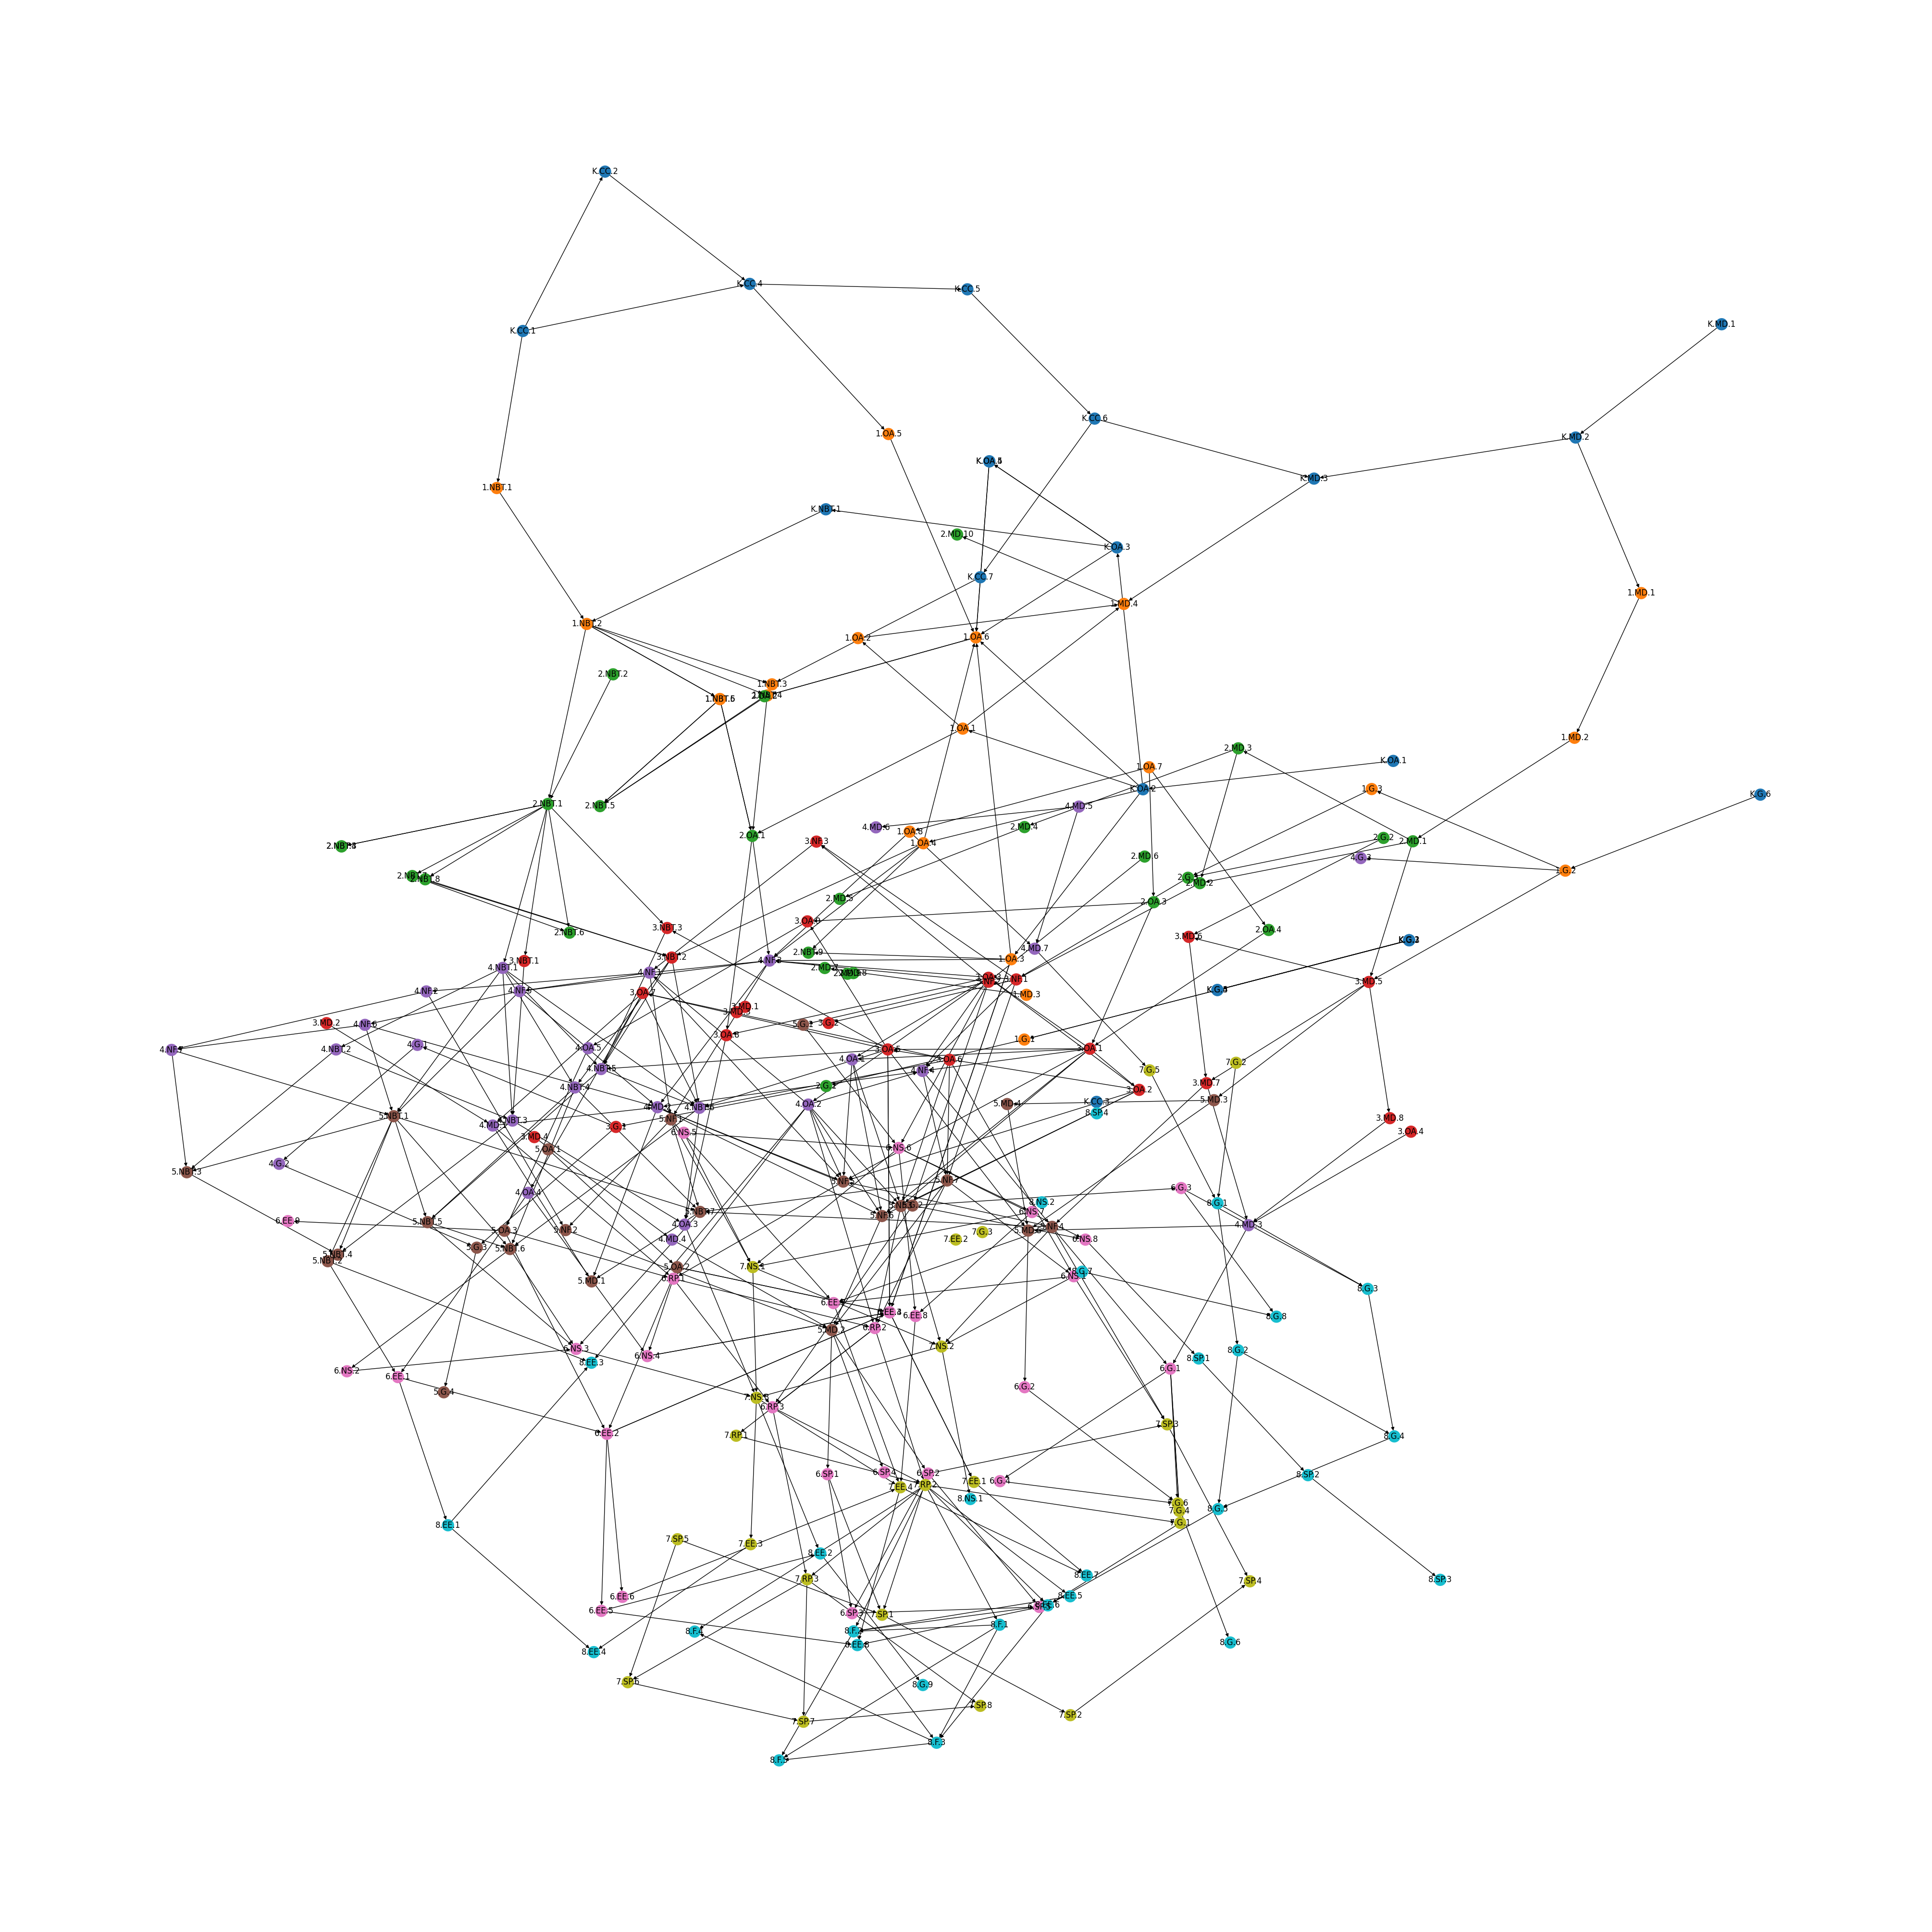

In [52]:
fig = plt.figure(figsize=(40,40))
nx.draw_kamada_kawai(G, with_labels=True, node_color = [colordict[df.loc[std,"grade"]] for std in G.nodes])

In [53]:
import numpy as np

In [54]:
pos = nx.kamada_kawai_layout(G)

In [68]:
pos

{'K.CC.1': array([-0.25429117,  0.83010795]),
 'K.CC.2': array([-0.19673051,  1.        ]),
 'K.CC.3': array([0.14761635, 0.00813388]),
 'K.CC.4': array([-0.09536612,  0.88028871]),
 'K.CC.5': array([0.0571135 , 0.87450266]),
 'K.CC.6': array([0.14631713, 0.73666137]),
 'K.CC.7': array([0.06620928, 0.5675313 ]),
 'K.OA.1': array([0.35548284, 0.37169585]),
 'K.OA.2': array([0.18014852, 0.34146246]),
 'K.OA.3': array([0.16188669, 0.59932528]),
 'K.OA.4': array([0.07247039, 0.69111381]),
 'K.OA.5': array([0.07247094, 0.69111365]),
 'K.NBT.1': array([-0.04204709,  0.63997163]),
 'K.MD.1': array([0.58554962, 0.83727706]),
 'K.MD.2': array([0.48326026, 0.71649776]),
 'K.MD.3': array([0.29997808, 0.67269631]),
 'K.G.1': array([0.36657026, 0.18056984]),
 'K.G.2': array([0.36660155, 0.18049066]),
 'K.G.3': array([0.36663164, 0.18041436]),
 'K.G.4': array([0.23227477, 0.12742172]),
 'K.G.5': array([0.23226687, 0.12744193]),
 'K.G.6': array([0.61268879, 0.33572387]),
 '1.OA.1': array([0.05387368,

In [69]:
kpos = {k:np.array([-v[1], v[0]]) for k,v in pos.items()}
kpos

{'K.CC.1': array([-0.83010795, -0.25429117]),
 'K.CC.2': array([-1.        , -0.19673051]),
 'K.CC.3': array([-0.00813388,  0.14761635]),
 'K.CC.4': array([-0.88028871, -0.09536612]),
 'K.CC.5': array([-0.87450266,  0.0571135 ]),
 'K.CC.6': array([-0.73666137,  0.14631713]),
 'K.CC.7': array([-0.5675313 ,  0.06620928]),
 'K.OA.1': array([-0.37169585,  0.35548284]),
 'K.OA.2': array([-0.34146246,  0.18014852]),
 'K.OA.3': array([-0.59932528,  0.16188669]),
 'K.OA.4': array([-0.69111381,  0.07247039]),
 'K.OA.5': array([-0.69111365,  0.07247094]),
 'K.NBT.1': array([-0.63997163, -0.04204709]),
 'K.MD.1': array([-0.83727706,  0.58554962]),
 'K.MD.2': array([-0.71649776,  0.48326026]),
 'K.MD.3': array([-0.67269631,  0.29997808]),
 'K.G.1': array([-0.18056984,  0.36657026]),
 'K.G.2': array([-0.18049066,  0.36660155]),
 'K.G.3': array([-0.18041436,  0.36663164]),
 'K.G.4': array([-0.12742172,  0.23227477]),
 'K.G.5': array([-0.12744193,  0.23226687]),
 'K.G.6': array([-0.33572387,  0.61268

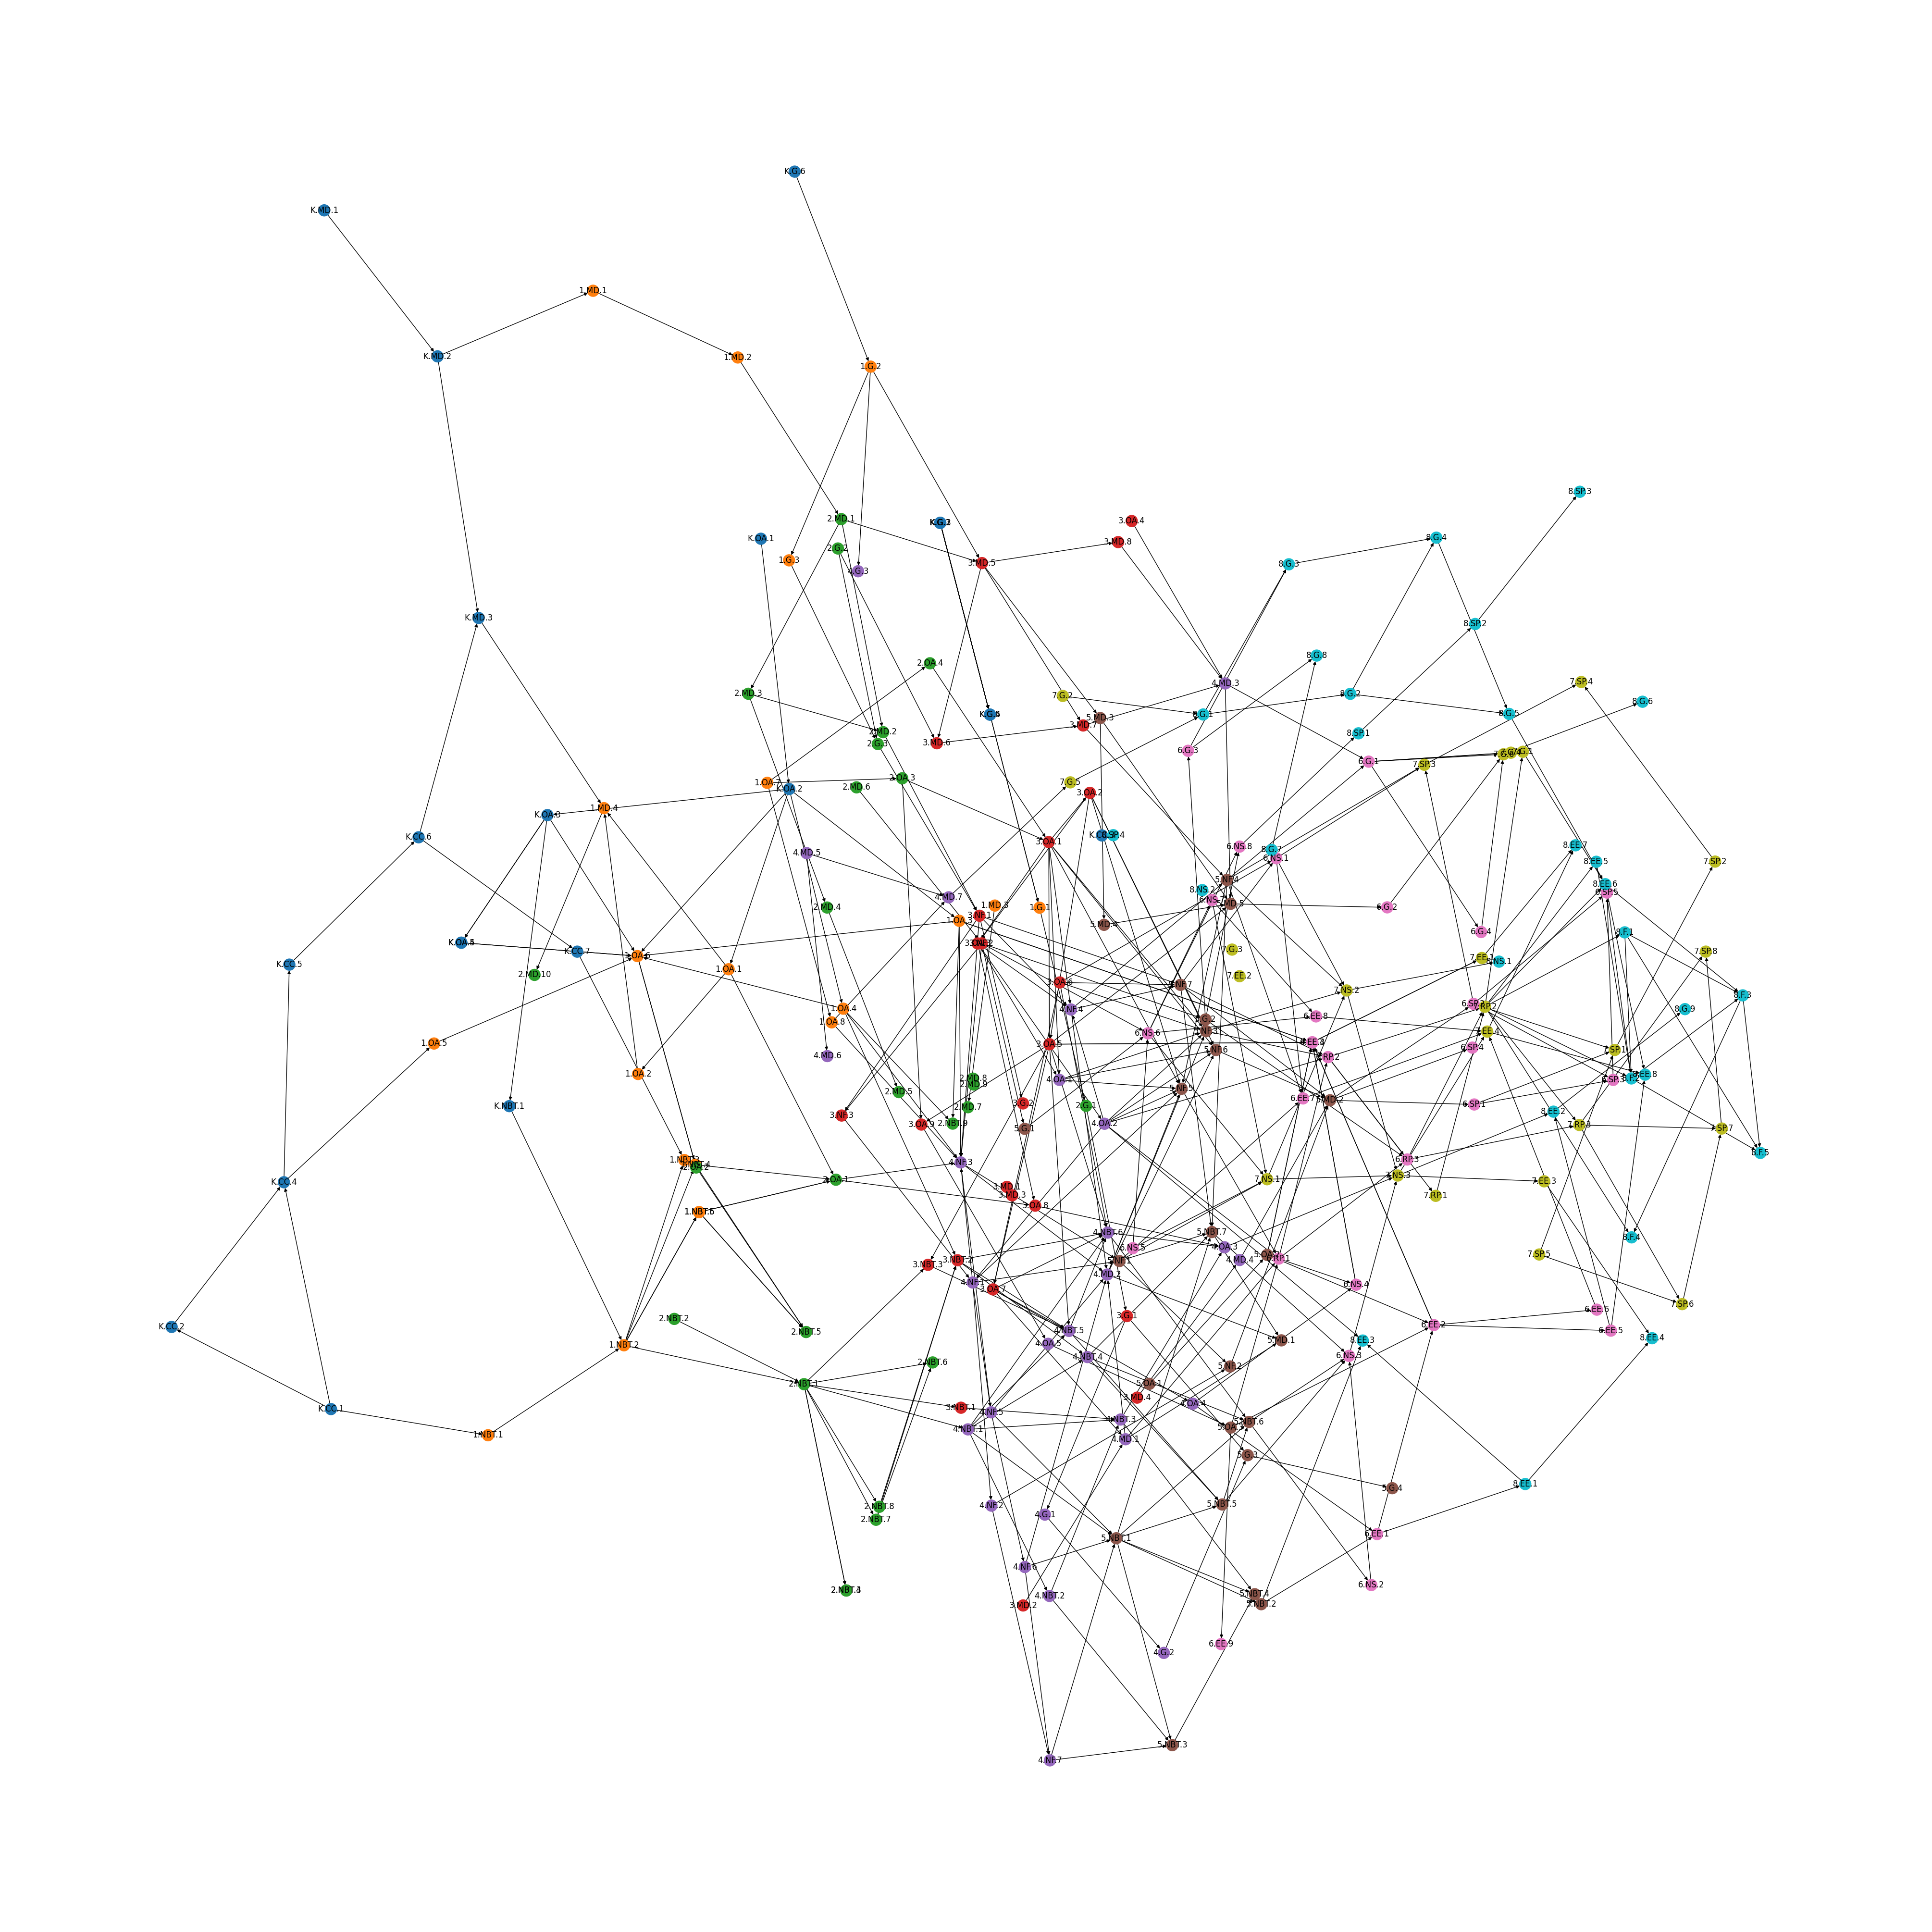

In [57]:
fig = plt.figure(figsize=(40,40))
nx.draw(G, pos=kpos, with_labels=True, node_color = [colordict[df.loc[std,"grade"]] for std in G.nodes])

In [92]:
def prereqs(std):
    prereqs = {std}
    def add_prereqs(STD):
            for prereq in df.loc[STD, "from"]:
                prereqs.add(prereq)
                add_prereqs(prereq)

    add_prereqs(std)
    #print(prereqs)
    std_graph = G.subgraph(prereqs)
    #print(std_graph.nodes)
    pos = nx.forceatlas2_layout(std_graph)
    kpos = {k:np.array([-v[1], v[0]]) for k,v in pos.items()}
    fig = plt.figure(figsize=(25,25))
    nx.draw(std_graph, pos=kpos, with_labels=True, node_color = [colordict[df.loc[std,"grade"]] for std in std_graph.nodes])
    plt.show()

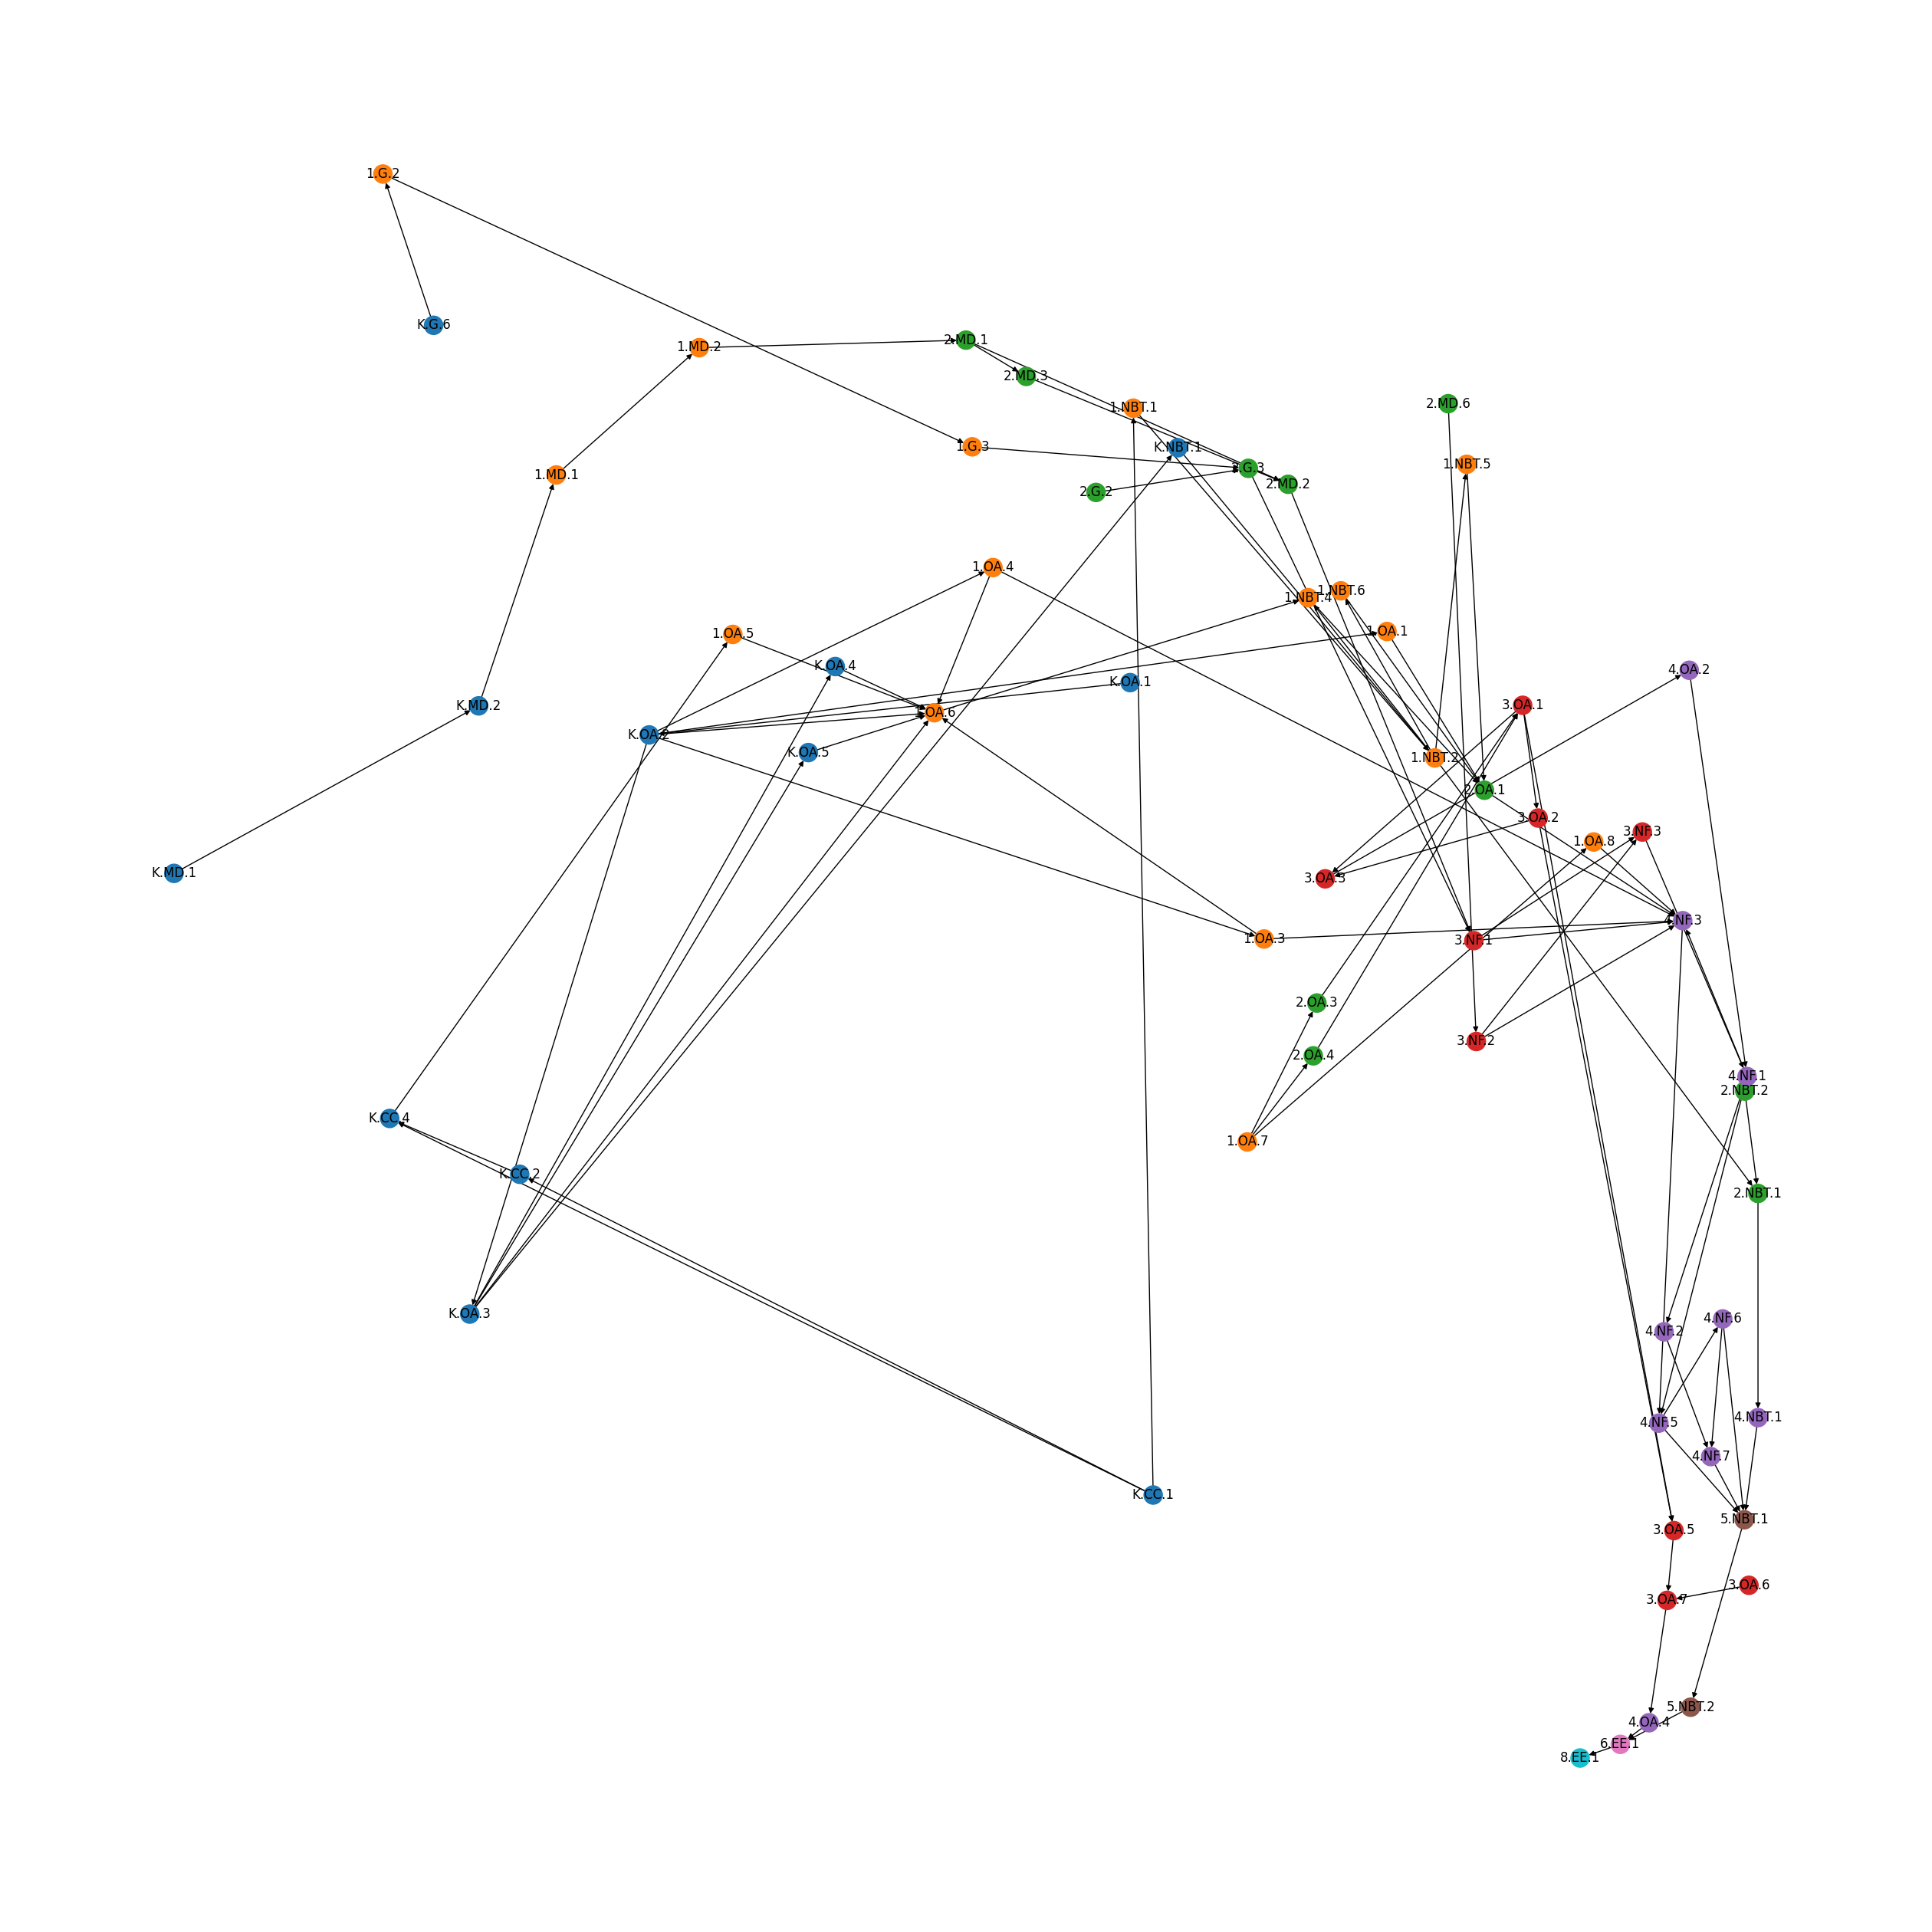

In [95]:
prereqs("8.EE.1")

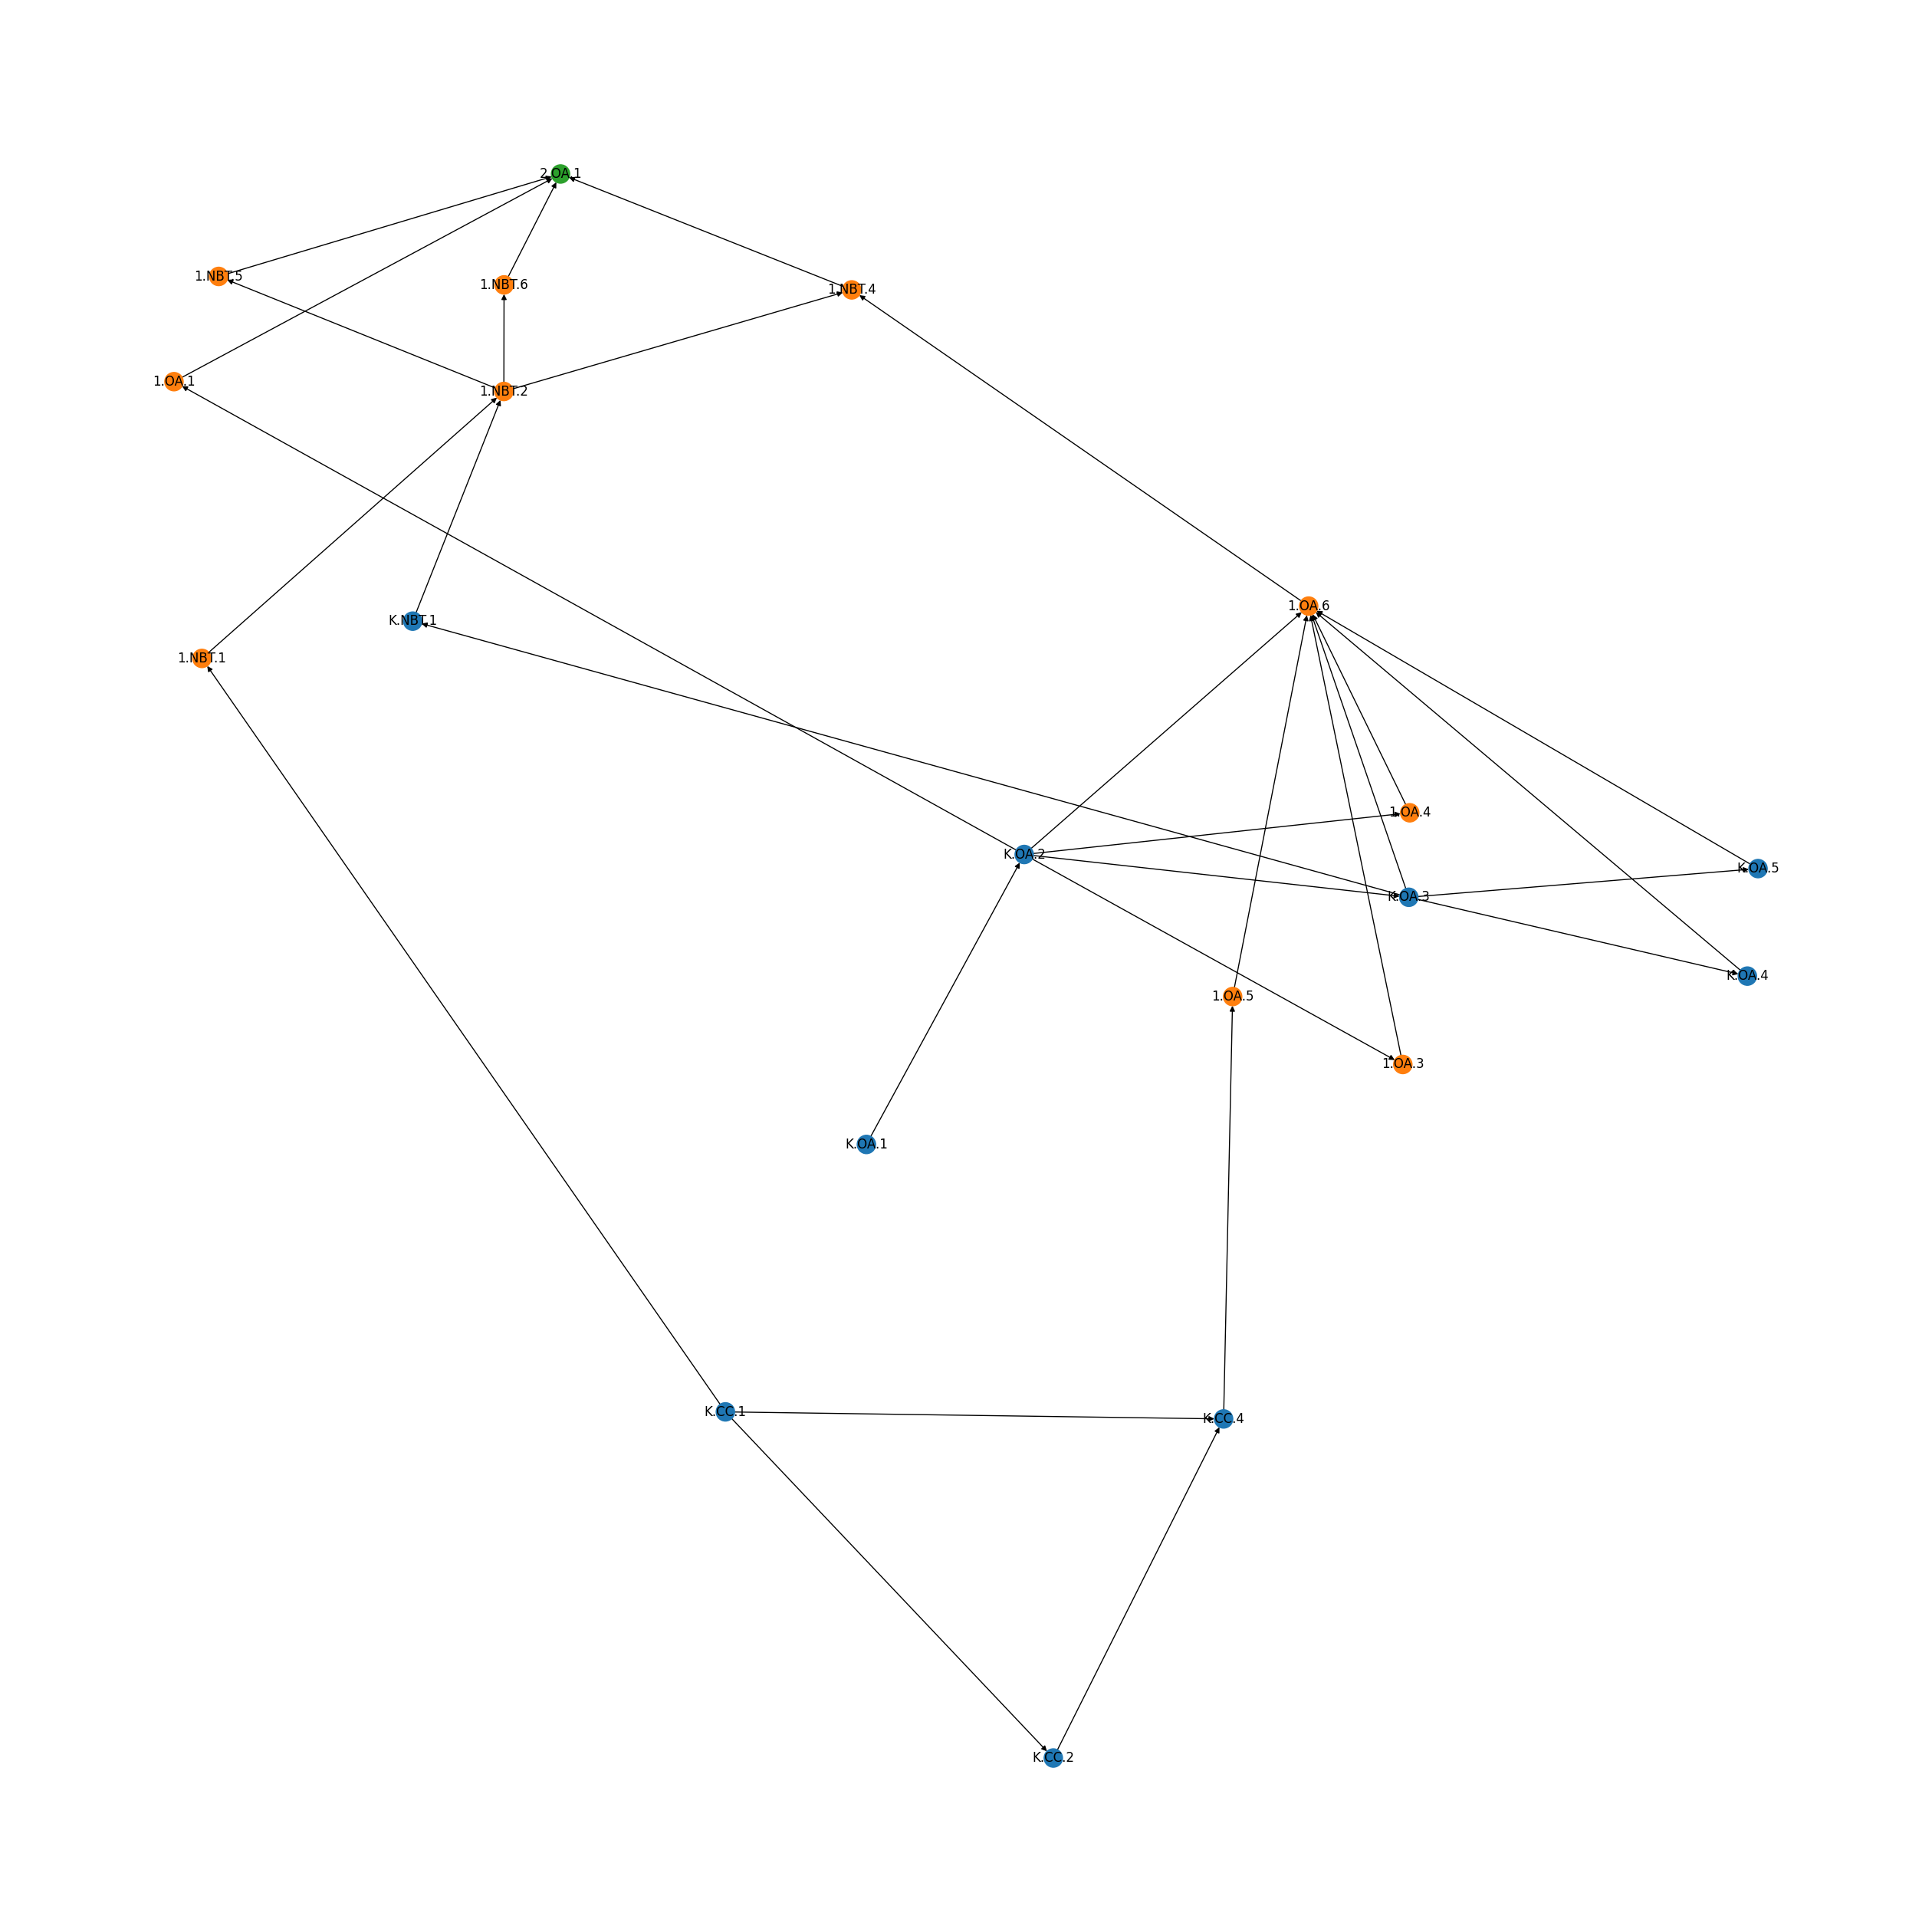

In [94]:
prereqs("2.OA.1")